In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans      # Correct way to import KMeans
from scipy.spatial import distance      # Correct way to import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


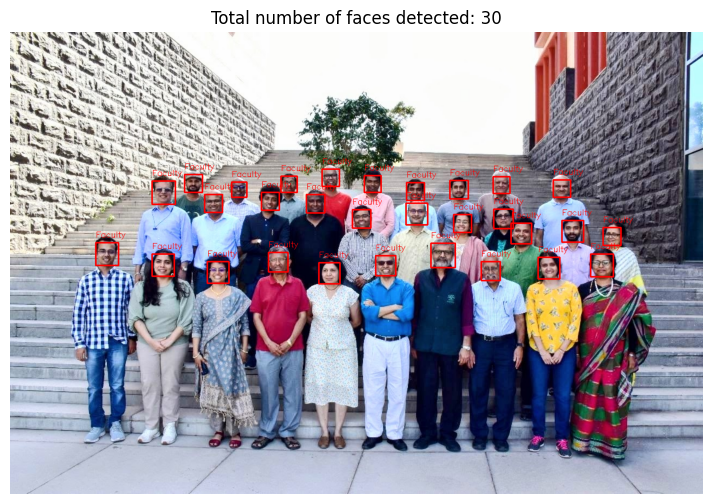

In [30]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Plaksha_Faculty.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

text = "Faculty"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (0, 0, 255)
font_thickness = 1

for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(img, text, (x, y - 10), font, font_scale, font_color, font_thickness)

# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.title(f"Total number of faces detected: {len(faces_rect)}")
plt.axis('off')  # hides axes
plt.show()


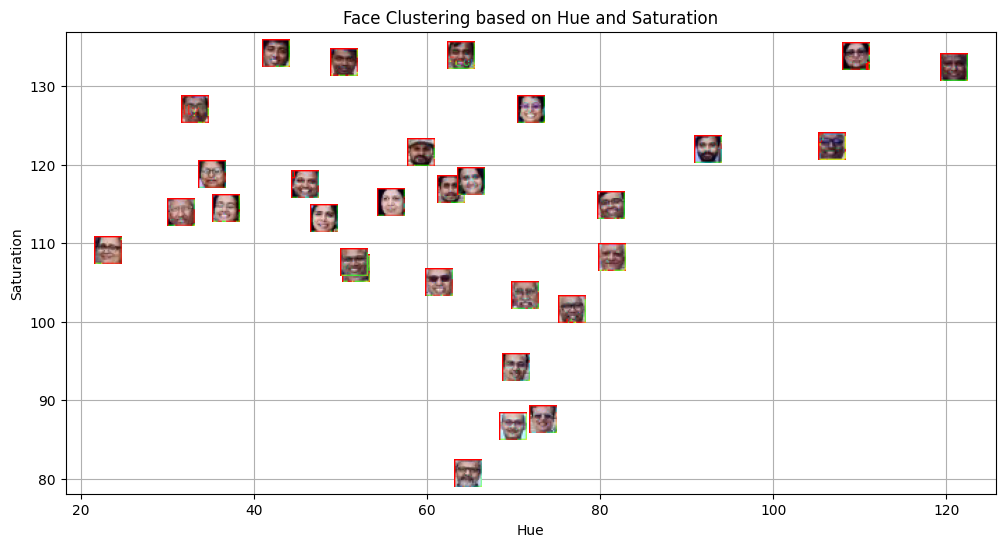

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.cluster import KMeans

# Assuming 'img' is already read and 'faces_rect' is detected
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # Convert BGR to HSV
hue_saturation = []
face_images = []

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Perform k-Means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(hue_saturation)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the faces
for i, (x, y, w, h) in enumerate(faces_rect):
    # Convert HSV to RGB for matplotlib and resize to 40x40 for better visibility
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0.3)
    ax.add_artist(ab)
    # Scatter point colored by cluster
    ax.scatter(hue_saturation[i, 0], hue_saturation[i, 1], c=f"C{labels[i]}", s=50)



# Labels, title, grid
ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_title("Face Clustering based on Hue and Saturation")
ax.grid(True)
plt.show()


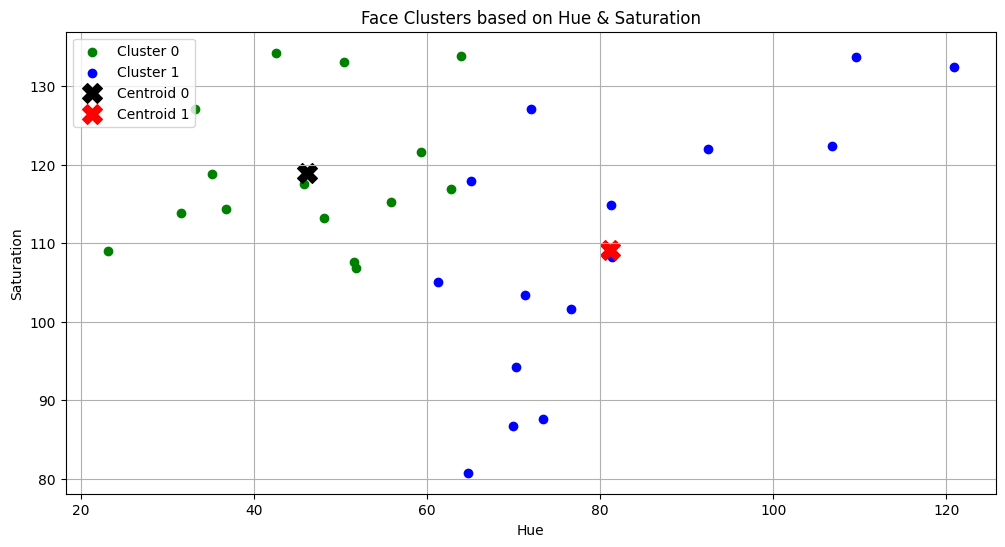

In [32]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1],
            c='green', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1],
            c='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1],
            c='black', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1],
            c='red', marker='X', s=200, label='Centroid 1')

# Labels and formatting
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clusters based on Hue & Saturation")
plt.legend()
plt.grid(True)
plt.show()


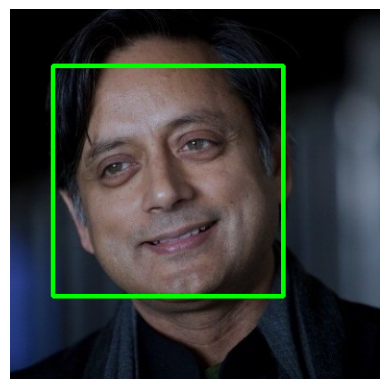

In [33]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
# Detect face  in the template image after converting it to gray and store it in template_faces
gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=5
)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()     

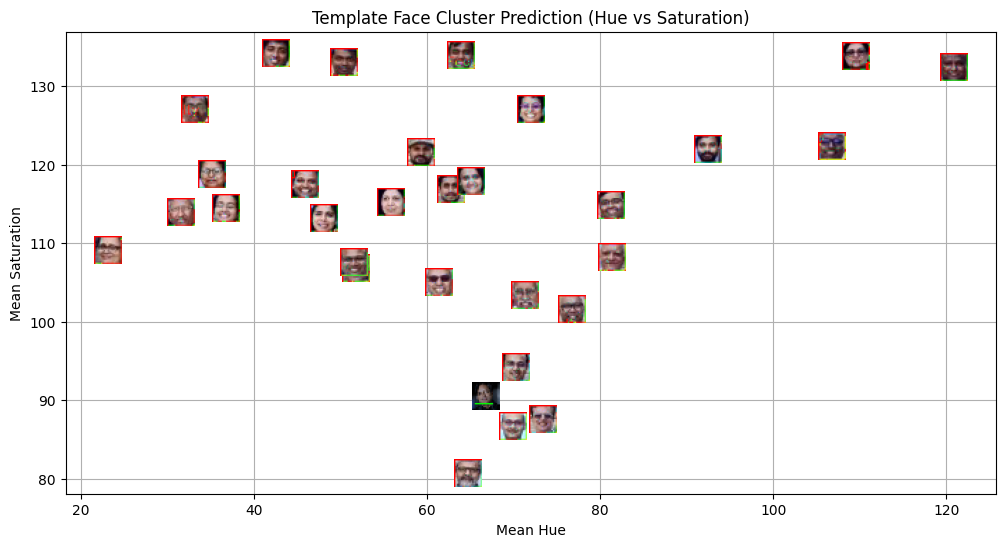

In [34]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)
# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])
# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.scatter(template_hue, template_saturation,
            c=color, marker='X', s=200, label='Template')
## Put x label
## Put y label
## Put title
## Add grid
## show plot

plt.xlabel("Mean Hue")
plt.ylabel("Mean Saturation")
plt.title("Template Face Cluster Prediction (Hue vs Saturation)")
plt.grid(True)
plt.show()

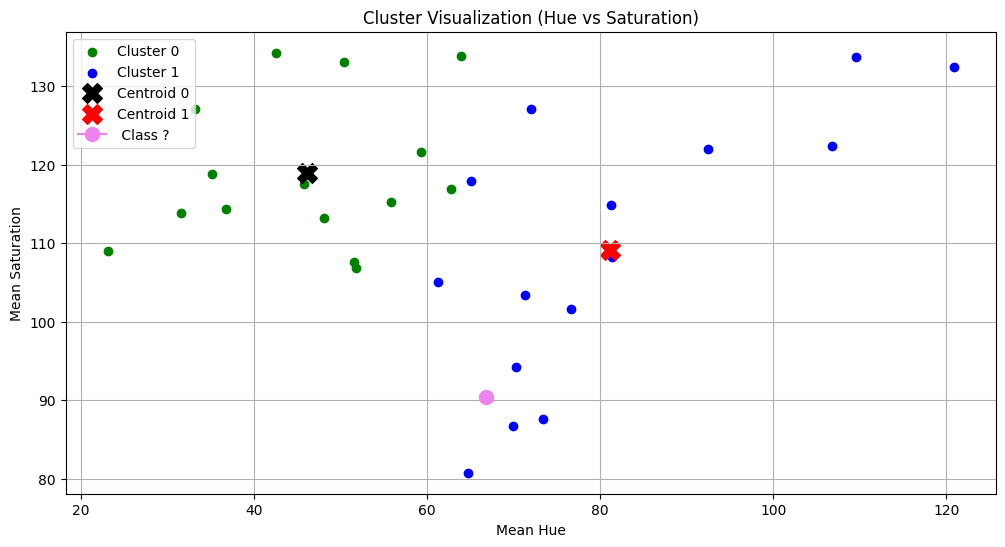

In [35]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
if len(cluster_0_points) > 0:
    plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1],
                c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
if len(cluster_1_points) > 0:
    plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1],
                c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1],
            marker='X', s=200, c='black', label='Centroid 0')  ## plot for centroid 0

plt.scatter(centroid_1[0], centroid_1[1],
            marker='X', s=200, c='red', label='Centroid 1')  ## plot for centroid 1

plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

# Labels and formatting
plt.xlabel("Mean Hue")
plt.ylabel("Mean Saturation")
plt.title("Cluster Visualization (Hue vs Saturation)")
plt.legend()
plt.grid(True)
plt.show()
                                            ## End of the lab 5 ##

<h2>Report: </h2>

<h2>Answer the following questions within your report:</h2>

<h4>1. What are the common distance metrics used in distance-based classification algorithms?</h4>

Some commonly used distance metrics include Euclidean distance, Manhattan distance, Minkowski distance, Cosine distance, Hamming distance, and Mahalanobis distance.

<h4>2. What are some real-world applications of distance-based classification algorithms?</h4>

Distance-based classification algorithms are widely applied in real-world scenarios where similarity comparison is important. They are used in face recognition systems to match facial features, in medical diagnosis to classify patients based on symptoms or test results, and in recommendation systems to identify users with similar preferences.

<h4>3. Explain various distance metrics.</h4>

Different distance metrics measure similarity between data points in different ways. Euclidean distance calculates the straight-line distance between two points and is commonly used for continuous numerical data. Manhattan distance is a way of measuring the distance between two points by adding up the absolute differences of their coordinates along each dimension and is often more robust to outliers. Minkowski distance is a generalized form that includes both Euclidean and Manhattan distances as special cases, allowing flexibility through a parameter p that adjusts how distance is measured. Cosine distance evaluates the angle between vectors and is useful in text analysis where magnitude is less important than direction. Hamming distance counts the number of differing positions between categorical or binary vectors. Mahalanobis distance accounts for correlations between features and scales distances based on data variance, providing a more accurate similarity measure for multivariate datasets.

<h4>4. What is the role of cross validation in model performance?</h4>

Cross validation plays an important role in evaluating and improving model performance by testing the model on multiple subsets of data. Instead of relying on a single train-test split, the dataset is divided into several folds where the model is trained on some portions and validated on the remaining parts. This process reduces overfitting, ensures better generalization, and provides a more reliable estimate of model accuracy.

<h4>5. Explain variance and bias in terms of KNN?</h4>

In the context of KNN, bias and variance describe how the choice of the parameter k affects model behavior. When k is very small, the model closely follows the training data, leading to low bias but high variance, meaning predictions are sensitive to noise and may overfit. Conversely, when k is large, the model becomes smoother and less sensitive to individual data points, resulting in higher bias but lower variance, which may cause underfitting. Thus, selecting an appropriate value of k is important to balance bias and variance and achieve optimal performance.